# Clustering Toronto neighborhoods based on Restaurants

In this project, we extract neighborhood data from Wikipedia and FourSquare API to build the dataset. We will then implement a K-means clustering algorithm.

First we begin by importing the relevant libraries. 

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge bs4 --yes
from bs4 import BeautifulSoup
import urllib.request

!conda install -c conda-forge lxml --yes

import lxml

print('Libraries imported.')

Store the Wiki URL in url and call urllib package to read the url

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

page = urllib.request.urlopen(url)

Read the page using BeautifulSoup package

In [3]:
soup = BeautifulSoup(page, "html5lib")

Extract all tables from soup

In [4]:
all_tables=soup.find_all("table")

Store relevant table as right_table

In [5]:
right_table=soup.find('table', class_='wikitable sortable')

Extract each column and append it as A,B and C

In [6]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

Merge A, B and C as a single dataframe under columns Postal Code, Borough, Neighborhood. We remove all 'Not assigned' boroughs and assign 'Not assigned' neighborhoods to their borough names.

In [7]:
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C

df['Postal Code'] = df['Postal Code'].astype(str).str[:-1]
df['Borough'] = df['Borough'].astype(str).str[:-1]
df['Neighborhood'] = df['Neighborhood'].astype(str).str[:-1]

df_cleaned_br = df[df['Borough'] != 'Not assigned']

for index,row in df_cleaned_br.iterrows():
   if(row['Neighborhood'] == 'Not assigned'):
        row['Neighborhood'] = row['Borough']

df_cleaned_br

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


Check the shape of the final dataframe

In [8]:
df_cleaned_br.shape

(103, 3)

Install geocoder package

In [9]:
!conda install -c conda-forge geocoder --yes

Solving environment: done

# All requested packages already installed.



Download postal code csv and store it in dataframe

In [10]:
postal_code_ll = pd.read_csv('http://cocl.us/Geospatial_data')
postal_code_ll['Postal Code'] = postal_code_ll['Postal Code'].astype(str)
postal_code_ll['Latitude'] = postal_code_ll['Latitude'].astype(str)
postal_code_ll['Longitude'] = postal_code_ll['Longitude'].astype(str)
postal_code_ll

,Postal Code,Latitude,Longitude
0,M1B,43.806686299999996,-79.19435340000001
1,M1C,43.7845351,-79.16049709999999
2,M1E,43.7635726,-79.1887115
3,M1G,43.7709921,-79.21691740000001
4,M1H,43.773136,-79.23947609999999
5,M1J,43.7447342,-79.23947609999999
6,M1K,43.7279292,-79.26202940000002
7,M1L,43.711111700000004,-79.2845772
8,M1M,43.716316,-79.23947609999999
9,M1N,43.692657000000004,-79.2648481


Join existing neighborhood table with table containing lat long, to get latitude and longitude for each neighborhood

In [11]:
result = pd.merge(df_cleaned_br, postal_code_ll,
                  left_on= 'Postal Code',
                  right_on = 'Postal Code',
                  how = 'left'
)


to_boroughs = result.drop(['Neighborhood'], axis=1)

to_boroughs['Latitude'] = pd.to_numeric(to_boroughs['Latitude'])
to_boroughs['Longitude'] = pd.to_numeric(to_boroughs['Longitude'])

to_boroughs

,Postal Code,Borough,Latitude,Longitude
0,M3A,North York,43.753259,-79.329656
1,M4A,North York,43.725882,-79.315572
2,M5A,Downtown Toronto,43.654260,-79.360636
3,M6A,North York,43.718518,-79.464763
4,M7A,Downtown Toronto,43.662301,-79.389494
5,M9A,Etobicoke,43.667856,-79.532242
6,M1B,Scarborough,43.806686,-79.194353
7,M3B,North York,43.745906,-79.352188
8,M4B,East York,43.706397,-79.309937
9,M5B,Downtown Toronto,43.657162,-79.378937


Get shape of resultant dataframe

In [12]:
result.shape

(103, 5)

Get latitude and longitude for Toronto

In [13]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Subset data for Toronto Boroughs only

In [14]:
toronto_data = result[result['Borough'] == 'Toronto'].reset_index(drop=True)

result['Toronto Check'] = result['Borough'].str.contains('Toronto', regex=True)

toronto_data = result[result['Toronto Check'] == True]

toronto_data = toronto_data.drop(['Toronto Check'], axis=1)

toronto_data['Latitude'] = pd.to_numeric(toronto_data['Latitude'])
toronto_data['Longitude'] = pd.to_numeric(toronto_data['Longitude'])

toronto_data= toronto_data.reset_index(drop = True)
toronto_data_negh_removed = toronto_data.drop(['Neighborhood'], axis=1)

toronto_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Get longitude and latitude for Toronto

In [15]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Generate map for neighborhoods in Toronto Boroughs

In [16]:
# create map of Manhattan using latitude and longitude values
map_toro = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toro)  
    
map_toro

Add FourSquare Credentials

In [17]:
CLIENT_ID = '3G0VKN0OQC4GAEQIKKR3LH3RYOFH4TI5R5Z2FNXISXCHEOTJ' # your Foursquare ID
CLIENT_SECRET = 'F2OAXIIWBE4TIC4BMINY434V1LZJHKE3F2ZIFORRXTXT1HST' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3G0VKN0OQC4GAEQIKKR3LH3RYOFH4TI5R5Z2FNXISXCHEOTJ
CLIENT_SECRET:F2OAXIIWBE4TIC4BMINY434V1LZJHKE3F2ZIFORRXTXT1HST


Get Latitude and Longitude of neighborhood

In [18]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


Create URL for API calling

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=3G0VKN0OQC4GAEQIKKR3LH3RYOFH4TI5R5Z2FNXISXCHEOTJ&client_secret=F2OAXIIWBE4TIC4BMINY434V1LZJHKE3F2ZIFORRXTXT1HST&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

Open URL using Requests package

In [20]:
url_results = requests.get(url).json()

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We get latitude and longitute of all venues in Toronto

In [22]:
venues = url_results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Dominion Pub and Kitchen,Pub,43.656919,-79.358967


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


This function gets the nearest venues in the neighborhood.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        url_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in url_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


toronto_venues stores the lat long values of each venue in the respective neighborhood. 

In [26]:
print(toronto_venues.shape)
toronto_venues.head()

(1636, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [27]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",26,26,26,26,26,26
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,67,67,67,67,67,67
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,37,37,37,37,37,37


In [28]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


In the following steps, we get the count of venues in each neighborhood grouped by categories and we will subset venues that are Restaurants.

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
toronto_onehot.shape

(1636, 232)

We subset the dataset to only include the columns that define restaurants. 

In [31]:
col = ['Neighborhood', 'Indian Restaurant']
rest_col = ['Neighborhood']
for ven in toronto_onehot.columns:
    if 'Restaurant' in ven:
        rest_col.append(ven)
        
toronto_mex_rtrnt = toronto_onehot[rest_col]
toronto_mex_rtrnt = toronto_mex_rtrnt.drop(columns = ['Restaurant'])
toronto_mex_rtrnt.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Ramen Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We group the table by the neighborhoods and apply the mean of each column to prepare the data for a kmeans algorithm

In [32]:
toronto_grouped = toronto_mex_rtrnt.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Ramen Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.00,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.017241,0.017241,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.034483,0.017241,0.00000,0.017241,0.000000,0.017241,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.014925,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,0.059701,0.029851,0.014925,0.000000,0.000000,0.000000,0.014925,0.014925,0.000000,0.00000,0.000000,0.000000,0.014925,0.014925,0.00000,0.029851,0.000000,0.014925,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.012987,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.051948,0.000000,0.000000,0.025974,0.012987,0.000000,0.000000,0.000000,0.00000,0.000000,0.012987,0.000000,0.051948,0.00000,0.012987,0.012987,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.030000,0.030000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010000,0.000000,0.030000,0.000000,0.00000,0.020000,0.000000,0.020000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.00

In [33]:
toronto_grouped.shape

(39, 41)

Get list of top 5 restaurant categories in each neighborhood.

In [34]:
num_top_venues = 5



for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    revTemp = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    print(revTemp)
    print('\n')

----Berczy Park----
                venue  freq
0  Seafood Restaurant  0.03
1   Indian Restaurant  0.02
2  Italian Restaurant  0.02
3    Greek Restaurant  0.02
4   French Restaurant  0.02


----Brockton, Parkdale Village, Exhibition Place----
                       venue  freq
0         Italian Restaurant  0.04
1           Asian Restaurant  0.00
2        Japanese Restaurant  0.00
3          Korean Restaurant  0.00
4  Latin American Restaurant  0.00


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                       venue  freq
0       Fast Food Restaurant  0.06
1        American Restaurant  0.00
2         Italian Restaurant  0.00
3          Korean Restaurant  0.00
4  Latin American Restaurant  0.00


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                       venue  freq
0        American Restaurant   0.0
1           Asian Restaurant   0.0
2        Japanese Re

Define columns to get most common categories. 

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Greek Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Sushi Restaurant,Thai Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Italian Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
2,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
4,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Middle Eastern Restaurant,French Restaurant,Sushi Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Modern European Restaurant


The next two blocks of code develop a graph to decide number of clusters to use for kmeans clustering.

In [37]:
Sum_of_squared_distances = []
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped.drop('Neighborhood', 1))
    Sum_of_squared_distances.append(km.inertia_)

We plot the graph to identify the elbow point. We notice that the elbow point is at k = 5

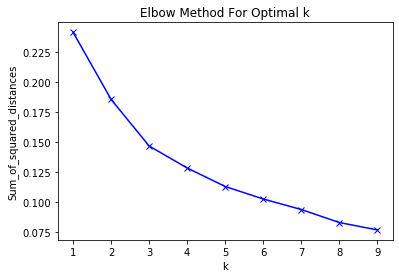

In [38]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Start K-Means Clustering

In [39]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

toronto_grouped_clustering.shape

(39, 40)

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Vietnamese Restaurant,Cuban Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Japanese Restaurant,Middle Eastern Restaurant,Italian Restaurant,Ramen Restaurant,Fast Food Restaurant,Modern European Restaurant,Ethiopian Restaurant,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,American Restaurant,Moroccan Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Middle Eastern Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant


Plot map with all neighborhoods marked by their respective clusters.

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

First Cluster: This cluster is dominated by Italian and American Restaurants.

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,St. James Town,0,American Restaurant,Moroccan Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,French Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,Middle Eastern Restaurant
5,Berczy Park,0,Seafood Restaurant,Greek Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Sushi Restaurant,Thai Restaurant
6,Central Bay Street,0,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Middle Eastern Restaurant,French Restaurant,Sushi Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Modern European Restaurant
7,Christie,0,Italian Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
13,"Toronto Dominion Centre, Design Exchange",0,American Restaurant,Japanese Restaurant,Seafood Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant
15,"India Bazaar, The Beaches West",0,Italian Restaurant,Sushi Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
16,"Commerce Court, Victoria Hotel",0,American Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Latin American Restaurant,French Restaurant
17,Studio District,0,American Restaurant,Seafood Restaurant,Italian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Thai Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant
25,"Parkdale, Roncesvalles",0,Cuban Restaurant,Italian Restaurant,Eastern European Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Doner Restaurant
26,Davisville,0,Sushi Restaurant,Italian Restaurant,Greek Restaurant,Thai Restaurant,Seafood Restaurant,Indian Restaurant,New American Restaurant,Cuban Restaurant,Fast Food Restaurant,Falafel Restaurant


Second Cluster: This is a unique neighborhood dominated by Thai and Mexican Restaurants only. Other cuisines also have a strong presence

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,"High Park, The Junction South",1,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant


Third Cluster: Contains more Vietnamese restaurants. Generally low presence of restaurants in these neighborhoods.

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",2,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,"Queen's Park, Ontario Provincial Government",2,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Vietnamese Restaurant,Cuban Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,"Garden District, Ryerson",2,Japanese Restaurant,Middle Eastern Restaurant,Italian Restaurant,Ramen Restaurant,Fast Food Restaurant,Modern European Restaurant,Ethiopian Restaurant,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant
4,The Beaches,2,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
8,"Richmond, Adelaide, King",2,Thai Restaurant,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Mediterranean Restaurant,Colombian Restaurant,Fast Food Restaurant,Modern European Restaurant
9,"Dufferin, Dovercourt Village",2,Brazilian Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Doner Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
10,"Harbourfront East, Union Station, Toronto Islands",2,Italian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Sushi Restaurant,Seafood Restaurant,New American Restaurant,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant
11,"Little Portugal, Trinity",2,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Cuban Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Greek Restaurant,New American Restaurant
14,"Brockton, Parkdale Village, Exhibition Place",2,Italian Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant
18,Lawrence Park,2,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant


Fourth Cluster: Only contains Sushi restaurants

In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,"Forest Hill North & West, Forest Hill Road Park",3,Sushi Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Doner Restaurant


Fifth Cluster: Cluster dominated by Greek and Italian Restaurants. Very few restaurants of other categories in this area. Other cuisines may struggle to do business.

In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"The Danforth West, Riverdale",4,Greek Restaurant,Italian Restaurant,Sushi Restaurant,Caribbean Restaurant,Indian Restaurant,American Restaurant,Seafood Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Falafel Restaurant
